# Sales report year 2021
This project was created to show an analysis made in a diesel engines workshop, where the data with the sales info is stored in an Excel document.
The idea is to give them a yearly report about their sales, a count of the paid, unpaid and invalid invoices, the total of the sales per year, per month, and categorization of the best customers by the total paid to the company

In [1]:
import pandas as pd
import xlrd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
invoices = pd.read_excel ('Sales.xls',index_col = 1)

## Select the paid invoices and separate them from the outstanding and the invalid invoices
It is important to note that the data upload was altered in order to protect the customer's personal information and the values are in Colombian pesos COP


In [3]:
paid_invoices = invoices[invoices['ESTADO'] == 'C']
unpaid_invoices = invoices[invoices['ESTADO'] == 'NC']
invalid_invoices = invoices[invoices['ESTADO'] == 'A']

In [4]:
paid_invoices [['FECHA','NIT','TERCERO','TOTAL']]

,FECHA,NIT,TERCERO,TOTAL
No. Fra.,,,,
FAC-112,2021-01-04,123,TR,2223780.0
FAC-113,2021-01-04,456,SE,1142400.0
FAC-114,2021-01-04,456,SE,833000.0
FAC-115,2021-01-04,789,AC,3213000.0
FAC-116,2021-01-04,789,AC,1380400.0
...,...,...,...,...
FAC-383,2021-12-13,456,SE,433329.2
FAC-384,2021-12-16,456,SE,1086019.6
FAC-385,2021-12-16,456,SE,513153.0


We check if the values of the three variables have the same amount of data than the principal data frame

In [5]:
invoices.shape[0]

276

In [6]:
unpaid_invoices.shape[0]

1

In [7]:
invalid_invoices.shape[0]

3

## Graphic with the total of the invoices

In [8]:
total_bills = [paid_invoices.shape[0],unpaid_invoices.shape[0],invalid_invoices.shape[0]]
bill_labels = ['PAID','INPAID','INVALID']
colors = ['red','blue','orange']

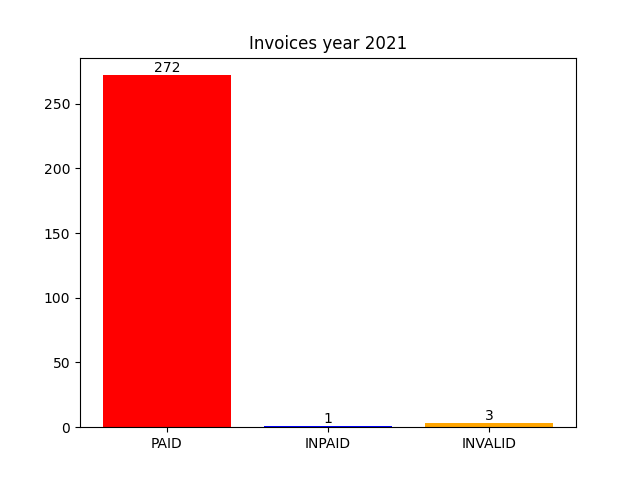

In [9]:
fig, ax = plt.subplots()
ax.bar(bill_labels,total_bills,color = colors)
ax.set_title('Invoices year 2021')
for i in range(len(total_bills)):
    plt.annotate(str(total_bills[i]), xy=(bill_labels[i],total_bills[i]), ha='center', va='bottom')
plt.show() 

## Income per month

In [10]:
total_revenues_month = paid_invoices.groupby(paid_invoices['FECHA'].dt.month)['SUBTOTAL'].sum()
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SET','OCT','NOV','DEC']
ipm = total_revenues_month[0:12].tolist()

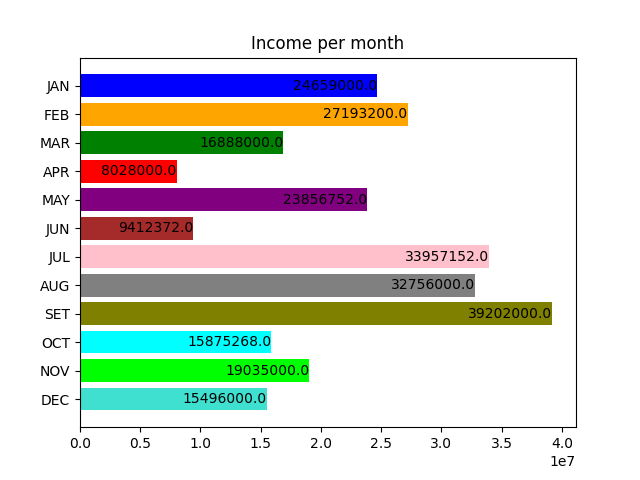

In [11]:
fig, ax = plt.subplots()
ax.barh(months,ipm,color = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan','lime','turquoise'])
ax.set_title('Income per month')

ax.invert_yaxis()
for i in range(len (ipm)):
    plt.annotate(str(ipm[i]), xy=(ipm[i],months[i]), ha='right',va='center')
plt.show() 

## The total amount of the paid and unpaid invoices during the year
For the paid invoices

In [16]:
paid_invoices['SUBTOTAL'].sum()

266358744.0

For the unpaid invoices

In [17]:
unpaid_invoices['SUBTOTAL'].sum()

1100000.0

## Get an organized list of clients by their total purchases

In [13]:
a = (paid_invoices.groupby(paid_invoices['TERCERO'],as_index = False)['SUBTOTAL'].sum()).sort_values (by=['SUBTOTAL'],ascending = False)
a

,TERCERO,SUBTOTAL
35,SE,47309000.0
1,AC,40947000.0
36,SV,31847000.0
37,T,24232000.0
42,TR,23650200.0
22,ILO,15266000.0
24,INCNT,14076000.0
10,DTO,8080000.0
45,ZH,6018600.0
32,PNSG,5200000.0


## Top 20 clients with highest paid values

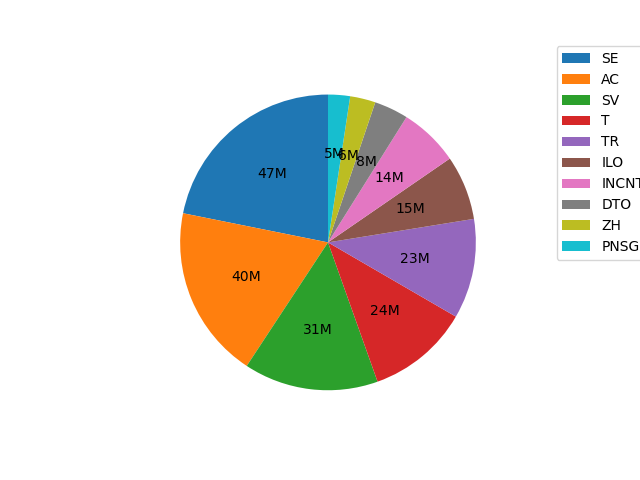

In [14]:
clients = (a['TERCERO'].head(10)).tolist()
total_sold =( a['SUBTOTAL'].head(10)).tolist()
fig1, ax1 = plt.subplots()

def func(pct,total_sold):
    absolute = int((np.round(pct/100.*np.sum(total_sold)))/1000000)
    return "{:01}M".format(absolute)

ax1.pie(total_sold,
        autopct=lambda pct: func(pct,total_sold), startangle=90)
plt.rcParams["figure.figsize"] = (11,6)
plt.gca().legend(clients,bbox_to_anchor=(1.1, 1.05))

plt.show()